In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


In [2]:
# Read file. Remember to replace the path
full_fz_rfg_sub = pd.read_csv('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/full_fz_rfg_sub.csv')

In [3]:
# top 10 companies sub meat
brand_sales = full_fz_rfg_sub.groupby('Brand Name').agg({'Dollar Sales':'sum'}).sort_values('Dollar Sales', ascending = False).head(10)
top10 = brand_sales.reset_index()['Brand Name']
top10_list = []
for i in top10:
    top10_list.append(i)
#top10_list
regex_pattern = '|'.join(top10_list)
filtered_df = full_fz_rfg_sub[full_fz_rfg_sub['Brand Name'].str.contains(regex_pattern, case=False, na=False)]
filtered_df['Manufacturer Name'].unique()

array(['BEYOND MEAT INC', 'CONAGRA BRANDS', 'KELLANOVA', 'KRAFT HEINZ CO',
       'FIELD ROAST GRAIN MEAT CO', 'PRIVATE LABEL',
       'TURTLE ISLAND FOODS INC', 'IMPOSSIBLE FOODS INC'], dtype=object)

## Product Counts & Product Transactions of Top 10 Companies

In [4]:
table_1 = filtered_df.drop_duplicates('Product Name').groupby(['Manufacturer Name']).agg({'Product Name':'count'}).reset_index()
# Product Counts
new_table_1 = table_1.groupby('Manufacturer Name').agg({'Product Name':'sum'}).rename(columns={'Product Name':'Product Counts'}).reset_index()
new_table_1

Manufacturer Name  Product Counts
0            BEYOND MEAT INC              26
1             CONAGRA BRANDS              64
2  FIELD ROAST GRAIN MEAT CO              21
3       IMPOSSIBLE FOODS INC              20
4                  KELLANOVA              93
5             KRAFT HEINZ CO              18
6              PRIVATE LABEL             177
7    TURTLE ISLAND FOODS INC              28

In [5]:
# Transaction Counts
table_2 = filtered_df.groupby(['Manufacturer Name']).agg({'Product Name':'count'}).rename(columns={'Product Name':'Transaction Records'}).reset_index()
table_2

Manufacturer Name  Transaction Records
0            BEYOND MEAT INC                30113
1             CONAGRA BRANDS                74447
2  FIELD ROAST GRAIN MEAT CO                28105
3       IMPOSSIBLE FOODS INC                21527
4                  KELLANOVA                99653
5             KRAFT HEINZ CO                30269
6              PRIVATE LABEL               139920
7    TURTLE ISLAND FOODS INC                38785

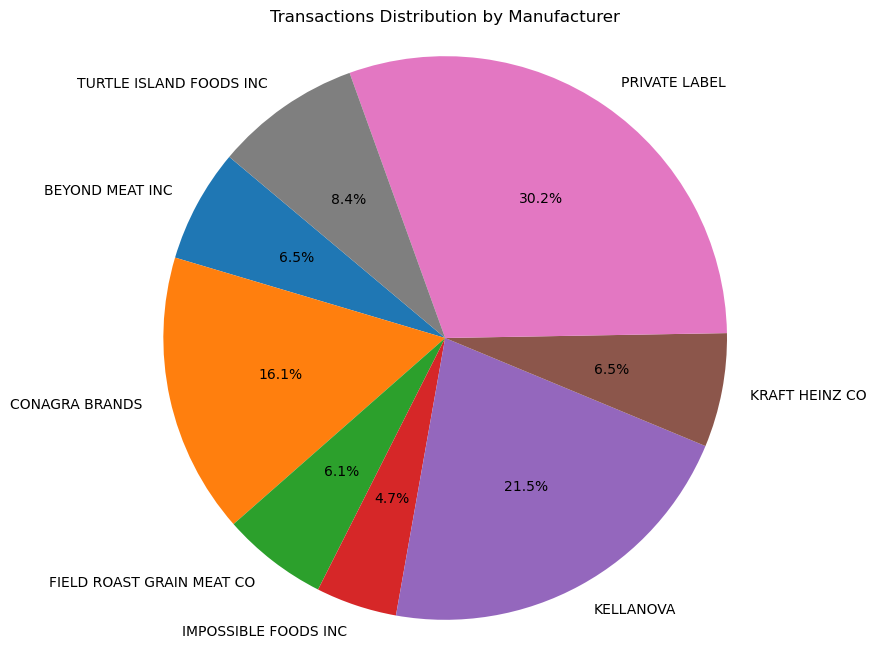

In [6]:
# Pie chart of Transactions
counts = table_2['Transaction Records'].sum()  # Summing the given values for each manufacturer
new_colors = ['#1f77b4',  # muted blue
              '#ff7f0e',  # safety orange
              '#2ca02c',  # cooked asparagus green
              '#d62728',  # brick red
              '#9467bd',  # muted purple
              '#8c564b',  # chestnut brown
              '#e377c2',  # raspberry yogurt pink
              '#7f7f7f',  # middle gray
              '#bcbd22',  # curry yellow-green
              '#17becf']  # blue-teal
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(table_2['Transaction Records'], labels=table_2['Manufacturer Name'], autopct='%1.1f%%', startangle=140, colors=new_colors)
plt.title('Transactions Distribution by Manufacturer')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [7]:
# Redo all the work takes so many time, i will just work on the model.

In [8]:
model_dataset = filtered_df[['Geography', 'Year', 'Quarter', 'Month', 'Season', 'Form', 'Manufacturer Name', 'Flavor / Scent', 'Product Name', 'Unit Sales', 'Volume Sales', 'Dollar Sales', 'Price per Unit']].reset_index()
model_dataset

index Geography  Year  Quarter  Month  Season     Form  \
0           22  Total US  2020        1      1  Winter  CRUMBLE   
1           23  Total US  2020        1      1  Winter  CRUMBLE   
2           24  Total US  2020        1      1  Winter  CRUMBLE   
3           32  Total US  2020        1      1  Winter      TIP   
4           33  Total US  2020        1      1  Winter   BURGER   
...        ...       ...   ...      ...    ...     ...      ...   
462814  991768      West  2024        1      1  Winter   SLICED   
462815  991769      West  2024        1      1  Winter    SLICE   
462816  991770      West  2024        1      1  Winter   SLICED   
462817  991771      West  2024        1      1  Winter   SLICED   
462818  991779      West  2024        1      1  Winter    SLICE   

              Manufacturer Name          Flavor / Scent  \
0               BEYOND MEAT INC                    BEEF   
1               BEYOND MEAT INC                  FEISTY   
2               BEYOND MEAT INC                 REGULAR   
3                CONAGRA BRANDS                    BEEF   
4                CONAGRA BRANDS     CHIPOTLE BLACK BEAN   
...                         ...                     ...   
462814  TURTLE ISLAND FOODS INC            PHILLY STEAK   
462815  TURTLE ISLAND FOODS INC              SMOKED HAM   
462816  TURTLE ISLAND FOODS INC       SMOKY MAPLE BACON   
462817  TURTLE ISLAND FOODS INC  SUN DRIED TOMATO BASIL   
462818            PRIVATE LABEL           SALT & PEPPER   

                                             Product Name    Unit Sales  \
0               FROZEN BEEF MEAT SUBSTITUTE CRUMBLE 11 OZ      9.366736   
1             FROZEN FEISTY MEAT SUBSTITUTE CRUMBLE 10 OZ  12675.859678   
2            FROZEN REGULAR MEAT SUBSTITUTE CRUMBLE 10 OZ  25782.299142   
3                    FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ  29839.311737   
4       FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTITUTE BUR...  26328.357411   
...                                                   ...           ...   
462814  REFRIGERATED PHILLY STEAK MEAT SUBSTITUTE SLIC...     19.107956   
462815  REFRIGERATED SMOKED HAM MEAT SUBSTITUTE SLICE ...   1616.376799   
462816  REFRIGERATED SMOKY MAPLE BACON MEAT SUBSTITUTE...    438.476189   
462817  REFRIGERATED SUN DRIED TOMATO BASIL MEAT SUBST...      4.000000   
462818  REFRIGERATED SALT AND PEPPER PLANT BASED TURKE...   3936.492162   

        Volume Sales   Dollar Sales  Price per Unit  
0           6.439631      57.980098        6.190000  
1        7922.412299   61487.791571        4.850779  
2       16113.936964  121129.905954        4.698181  
3       16784.612852  104457.642635        3.500672  
4       19746.268058   97010.214893        3.684628  
...              ...            ...             ...  
462814      6.569315      66.686765        3.490000  
462815    555.710344    6179.727236        3.823197  
462816    191.833333    1925.494666        4.391332  
462817      1.375200      16.960000        4.240000  
462818   1353.366005   12019.749412        3.053416  

[462819 rows x 14 columns]

In [9]:
model_dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462819 entries, 0 to 462818
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              462819 non-null  int64  
 1   Geography          462819 non-null  object 
 2   Year               462819 non-null  int64  
 3   Quarter            462819 non-null  int64  
 4   Month              462819 non-null  int64  
 5   Season             462819 non-null  object 
 6   Form               462819 non-null  object 
 7   Manufacturer Name  462819 non-null  object 
 8   Flavor / Scent     462819 non-null  object 
 9   Product Name       462819 non-null  object 
 10  Unit Sales         462819 non-null  float64
 11  Volume Sales       462819 non-null  float64
 12  Dollar Sales       462819 non-null  float64
 13  Price per Unit     462819 non-null  float64
dtypes: float64(4), int64(4), object(6)
memory usage: 49.4+ MB


In [10]:
columns_to_convert = ['Geography', 'Form', 'Flavor / Scent']
for column in columns_to_convert:
    model_dataset[column] = model_dataset[column].astype('category')

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Load your datase
# Define the independent variables (features) and the dependent variable (target)
features = ['Geography', 'Form', 'Flavor / Scent']
target = 'Dollar Sales'

# Preprocessing: Convert categorical variables to dummy variables
# We'll use ColumnTransformer to apply OneHotEncoder to categorical features
categorical_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), features)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(model_dataset[features], model_dataset[target], test_size=0.2, random_state=0)

# Create a pipeline that first transforms the data and then fits a linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', categorical_transformer),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the Dollar Sales on the test set
y_pred = pipeline.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print model coefficients and intercept
model = pipeline.named_steps['regressor']
print(f'Model coefficients: {model.coef_}')
print(f'Model intercept: {model.intercept_}')

# Note: Replace 'path_to_your_data.csv' with the actual path to your dataset.


Mean Squared Error: 2496045143.115834
Model coefficients: [  -122.06989565    616.2325632    5925.65320941  -7671.49695677
  -5536.1620448    1353.01195268  48954.69377131   -367.96889428
 -13740.24482464 -14904.96539632 -12599.24610714 -15021.97797729
  11449.07753544  10593.49364943  -3203.57518385   2198.48636465
  43770.34828474   5332.46715426 -12911.28502208  11189.59042945
  -9797.91078202 -14990.91786533   6221.87477284  33815.22855375
  -3614.98998787  32160.49542534  -7535.33223936  42153.35852384
  13665.25959942  34798.72317255 -25539.36592244  16761.85491779
 -22672.76078799   9403.90532501  13880.6216922    5118.83795647
  18982.73280314 -10189.99322572  -7928.32728495 -15609.5481589
  -6828.47294963  20245.76851491   -109.63793977 -16179.51319001
 -56573.68389603   5125.80917541  -1531.83219345 -13287.0763047
   4996.8809434   10016.01923554  28428.53102376  -3508.33017508
   -593.89830304  -1997.43897513  21045.12022318   5793.10979911
  24620.67506595 -58191.38011255 -